# Probability

## Jack Bennetto
### January 16, 2017

## Objectives

* Use permutations and combinations to solve probility problems.
* Use basic laws of probability.
* Understand a random variable and derive common properties.
* Understand the limits of correlation.
* Recognize common probability distributions, including Bernoulii, binomial, geometric, Poisson, uniform, normal, and exponetial.

## Agenda

Morning

 * Review sets
 * Discuss permutations and combinations
 * Discuss laws of probability
 
Afternoon

 * Discuss random variables
 * Discuss common distributions

## Some definitions

* A set $S$ consists of all possible outcomes or events and is called the sample space
* Union: $A \cup B = \{ x: x \in A ~\mathtt{ or} ~x \in B\}$
* Intersection: $A \cap B = \{x: x \in A ~\mathtt{and} ~x \in B\}$
* Complement: $A^\complement = \{ x: x \notin A \}$
* Disjoint: $A \cap B = \emptyset$
* Partition: a set of pairwise disjoint sets, ${A_j}$, such that $\underset{j=1}{\overset{\infty}{\cup}}A_j = S$
* $\left|A \right| \equiv$ number of elements in $A$
* DeMorgan's laws: $(A \cup B)^\complement = A^\complement \cap B^\complement$ and  $(A \cap B)^\complement = A^\complement \cup B^\complement$
* Plus, commutative, associative, and distributive laws

In [4]:
import scipy.stats as scs
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

## Permutations and Combinations

In general, there are $n!$ ways we can order $n$ objects, since there are $n$ that can come first, $n-1$ that can come 2nd, and so on. So we can line 20 students up $20!$ ways.

In [5]:
math.factorial(20)

2432902008176640000

Suppose we choose 5 of you at random from the class of 20 students. How many different ways could we do that?

If the order matters, it's a **permutation**. If the order doesn't, it's a **combination**.

There are $20$ ways they can choose one student, $20 \cdot 19$ ways we can choose two, and so on, so $$20\cdot19\cdot18\cdot17\cdot16 = \frac{20!}{15!} = P(20, 15)$$ ways we can choose five students, assuming the order matters.

In [6]:
def permutations(n, k):
    return math.factorial(n)/math.factorial(n-k)

permutations(20,5)

1860480

There are $5!$ different way we can order those different students, so the number of combinations is that number divided by $5!$. We write this as $${20 \choose 5} = \frac{20!}{15! \cdot 5!}$$

In [7]:
def combinations(n, k):
    return math.factorial(n)/(math.factorial(n-k) * math.factorial(k))

combinations(20,5)

15504

### Tea-drinking problem

There's a classic problem in which a woman claims she can tell whether tea or milk is added to the cup first. The famous statistician R.A. Fisher proposed a test: he would prepare eight cups of tea, four each way, and she would select which was which.

Assuming the null hypothesis (that she was guessing randomly) what's the probability she guess all correctly?

## Multinomial

Combinations explain the number of ways of dividing something into two catagoies. When dividing into more categories, use

$${n \choose {n_1, n_2, ... n_k}} = \frac{n!}{n_1! n_2! ... n_k!}$$

which reduces to the above for two cases.

## Definition of probability

Given a sample space S, a *probability function* P of a set has three properties.

* $P(A) \ge 0 \; \forall \; A \subset S$
* $P(S) = 1$
* For a set of pairwise disjoint sets $\{A_j\}$, $P(\cup_j A_j) = \sum_j P(A_j)$

## Independence

Two events $A$ and $B$ are said to be *independent* iff 

$$ P(A \cap B) = P(A) P(B)$$

or equivalently

$$ P(B \mid A) = P(B)$$

so knowlege of $A$ provides no information about $B$. This can also be written as $A \perp B$.

### Example: dice

The probability of rolling a 1 on a single fair 6-sided die is $1\over 6$.

What's the probability of two dice having a total value of 3?

# Bayes' theorem

Bayes' therem says that

$$P(A\mid B) = \frac{P(B\mid A) P(A)}{P(B)}$$
Where A and B are two possible events.

To prove it, consider that


$$\begin{equation}
\begin{aligned}
P(A\mid B) P(B) & = P(A \cap B) \\
            & = P(B \cap A) \\
            & = P(B\mid A) P(A) \\
\end{aligned}
\end{equation}
$$

so dividing both sides by $P(B)$ gives the above theorem.

In here we usually think of A as being our hypothesis, and B as our observed data, so

$$ P(hypothesis \mid data) = \frac{P(data \mid hypothesis) P(hypothesis)}{P(data)}$$

where
$$ P(data \mid hypothesis) \text{ is the likelihood} \\
P(hypothesis) \text{ is the prior probability} \\
P(hypothesis \mid data) \text{ is the posterior probability} \\
P(data) \text{ is the normalizing constant} \\
$$



### Example: the cookie problem

Bowl A has 30 vanilla cookies and 10 chocolate cookies; bowl B has 20 of each. You pick a bowl at random and draw a cookie. Assuming the cookie is vanilla, what's the probability it comes from bowl A?

## Law of Total Probability

If {B_n} is a partition of all possible options, then

$$\begin{align}
P(A) & = \sum_j P(A \cap B_j) \\
     & = \sum_j P(A \mid B_j) \cdot P(B_j)
\end{align}
$$


## Probability chain rule


$$\begin{align}
P(A_n, A_{n-1}, ..., A_1) & = P(A_n \mid A_{n-1},...,A_1) \cdot P(A_{n-1},...,A_1) \\
 & = P(A_n \mid A_{n-1},...,A_1) \cdot P(A_{n-1} \mid A_{n-2},...,A_1) \cdot P(A_{n-1},...,A_1) \\
 & = \prod_{j=1}^n P(A_j \mid A_{j-1},...,A_1)
\end{align}
$$

# Afternoon Lecture

## Random Variables

Given a sample space $S$, a *random variable* $X$ is a function $X(s): S \mapsto \mathbb{R}$

* Use capital letters for probability, lower case for instances
* We write $X \sim XYZ(\alpha, \beta, ...)$ to mean a variable is distributed like $XYZ$
  * E.g.: $X \sim N(0,1)$


## Distributions

We're using `scipy.stats` for all distributions, since those follow a nice, object-oriented with all the relavant methods for each.

Note that many distributions can be parameterized in different ways, e.g., one could talk about the mean and standard deviation of a normal curve, or the mean and the variance.

There are two different ways the methods can be called:

In [326]:
print scs.norm(0,1).rvs(10)
print scs.norm.rvs(0,1,10)

[-0.67327483  0.09437165 -0.29041379 -0.23309672  1.19123373 -0.84746331
  1.80381793 -1.378839    1.01328323 -0.34919373]
[ 0.66402616  2.19249451 -0.16416681 -2.29793604 -1.03753584  0.14249089
 -0.22948086 -0.49407533  1.31257428 -0.09025114]


Although scipy documentation focuses on the second, I prefer the first (frozen) form because the parameter order is easier to remember and it's an object oriented approach. That said, the second might be more clear when using arrays for distribution parameters.

## Cumulative distribution function (CDF)

The **cumulative distribution function** of a random variable X is

$$F_X(x) = P(X \le x)$$

Properties
 * Increases monotomically
 * $0 \le F_X(x) \le 1$
 * $\underset{x \rightarrow -\infty}{\lim} F_X(x) = 0$
 * $\underset{x \rightarrow \infty}{\lim} F_X(x) = 1$

For example:

(-0.1, 1.1)

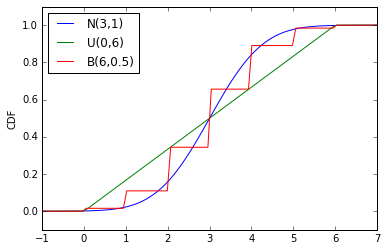

In [17]:
x = np.linspace(-1,7,100)
plt.plot(x, scs.norm(3,1).cdf(x), label='N(3,1)')
plt.plot(x, scs.uniform(0,6).cdf(x), label='U(0,6)')
plt.plot(x, scs.binom(6,0.5).cdf(x), label='B(6,0.5)')
plt.legend(loc='upper left')
plt.ylabel('CDF')
plt.ylim(ymin= -0.1, ymax=1.1)

## Discrete distributions: probability mass function (PMF)

The **probability mass function** gives the probability of a random variable with a **discrete distribution** having a particular value.

$$f_X(x) = P(X=x), \; \forall \; x$$

$$\sum_{X=x} f_X(x) = 1$$

## Continuous distributions: probability density function (PDF)
The **probability density function** is the derivative of the CDF and gives the relative probability of a random variable with a continuous distribution having a particular value.

$$f_X(x)dx = P(x < X < x + dx)$$

$$\int_{-\infty}^\infty f_X(x)dx = 1$$

(-0.1, 0.5)

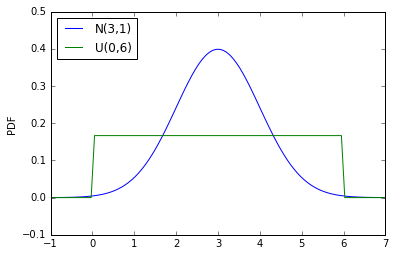

In [18]:
plt.plot(x, scs.norm(3,1).pdf(x), label='N(3,1)')
plt.plot(x, scs.uniform(0,6).pdf(x), label='U(0,6)')
plt.legend(loc='upper left')
plt.ylabel('PDF')
plt.ylim(ymin=-0.1, ymax=0.5)

## Quantile (percentile point function)

The **quantile** function or **PPF** is the inverse of the CDF.

$$Q_{\alpha}(X) = \underset{X}{\min} { x: P(X \leq x) \geq \alpha }$$

In [356]:
print scs.norm(0,1).ppf(.025)
print scs.norm(0,1).ppf(.975)

-1.95996398454
1.95996398454


## Properties of distributions

### Expectation/mean
The **expectation** or or mean of some function $g(x)$ of a random variable is::

$$\mu_{g(X)} = \mathbb{E}(g(X))$$

For a discrete distribution:
$$\mathbb{E}(g(X)) = \sum_{s} g(s)f_X(s)$$
$$\mu_X = \sum_{s} s \cdot f_X(s)$$

For a continuous distribution:

$$\mathbb{E}(g(X)) = \int_{-\infty}^\infty g(s)f_X(s)ds$$
$$\mu_X = \int_{-\infty}^\infty s \cdot f(s)ds$$

In [19]:
dist = scs.poisson(3)
x = np.arange(0,100)
pmf = dist.pmf(x)
print "Calculated mean: {}".format(np.sum(x*pmf))
print "Actual mean: {}".format(dist.mean())

Calculated mean: 3.0
Actual mean: 3.0


### Variance

The variance is the spread of a distribution.

$$\mathtt{Var}(X) = \sigma^2(x) = \mathbb{E}((x - \mu_x)^2)$$


In [358]:
print "Calculated variance: {}".format(np.sum((x-dist.mean())**2*pmf))
print "Actual variance: {}".format(dist.var())

Calculated variance: 3.0
Actual variance: 3.0


## Skew and kurtosis

The **skew** and **kurtosis** of a distribution are higher-order moments.

$$\gamma_1 = \mathbb{E}\left(\left(\dfrac{X - \mu}{\sigma}\right)^3\right)$$

$$\kappa = \mathbb{E}\left(\left(\dfrac{X - \mu}{\sigma}\right)^4\right)$$

In [371]:
print "Calculated skew: {}".format(np.sum(((x-dist.mean())/dist.std())**3*pmf))
print "Actual skew: {}".format(dist.stats(moments='mvsk')[2])

print "Calculated kurtosis: {}".format(np.sum(((x-dist.mean())/dist.std())**4*pmf))
print "Actual kurtosis: {}".format(dist.stats(moments='mvsk')[3] + 3)

Calculated skew: 0.57735026919
Actual skew: 0.57735026919
Calculated kurtosis: 3.33333333333
Actual kurtosis: 3.33333333333


What's with that "+ 3" in kurtosis?

## Covariance

Covarince is a measure of how much two random variables change together.

$$\begin{align}
Cov(X, Y) & = E((X-\mu_x)(Y-\mu_y)) \\
          & = E(XY) - E(X)E(Y)
\end{align}
$$

## Correlation

Correlation is a version of correlation normalized by the variance of each.

$$Corr(X,y) = \frac{Cov(X,y)}{\sigma_X \sigma_Y} $$

It measures the strength of the relationship between variables...but does not imply causation (https://xkcd.com/552/)

## Anscombe's quartet

Sometimes numbers aren't enough.

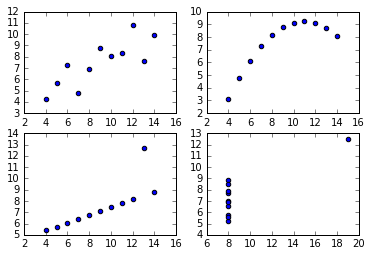

In [378]:
quartet = pd.DataFrame(
    [[10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58],
    [8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76],
    [13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],
    [9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
    [11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],
    [14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
    [6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],
    [4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
    [12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],
    [7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
    [5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89]],
    columns=['x1','y1','x2','y2','x3','y3','x4','y4'])

fig=plt.figure()
fig.add_subplot(221).scatter(quartet.x1, quartet.y1)
fig.add_subplot(222).scatter(quartet.x2, quartet.y2)
fig.add_subplot(223).scatter(quartet.x3, quartet.y3)
fig.add_subplot(224).scatter(quartet.x4, quartet.y4)

## Common distributions

Distributions are specified by one of more parameters, which can often be specified in different ways. The are sometimes clasified as *location parameters*, *scale parameters*, or *shape parameters*.

In [20]:
def generate_label(param_names, param_values):
    '''generate parameter labels for the legend'''
    params = [ "{}={}".format(name,value) for name,value
                       in zip(param_names, param_values)
                       if name is not None ]
    return ",".join(params)

In [21]:
def draw_pmf_grid(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)

    ax.bar(xpts, [dist(*param_values).pmf(x) for x in xpts], label=label, align='center')
    
def draw_pmfs_grid(dist, param_names, param_values_list, xpts, figsize=(8,6)):
    '''draw several pmfs for for various parameter values for a given distribution'''
    fig = plt.figure(figsize=figsize)
    

    for i, param_values in enumerate(param_values_list, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values_list), 1, i)
        else:
            ax = fig.add_subplot(len(param_values_list), 1, i, sharey=ax1)

        draw_pmf_grid(ax, dist, param_names, param_values, xpts)
        ax.set_ylabel('pmf')
        ax.set_ylim(ymin=0)
        ax.set_xlim(xmin=min(xpts)-.5, xmax=max(xpts)+.5)
        ax.legend()
    plt.show() 

In [22]:
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''draw a pdf of a given distribution for given parameters'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label)
    
def draw_pdfs(dist, param_names, param_values_list, xmin, xmax, figsize=(8,6)):
    '''draw several pdfs for for various parameter values for a given distribution'''
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    xpts = np.linspace(xmin, xmax, 100)

    for param_values in param_values_list:
        draw_pdf(ax, dist, param_names, param_values, xpts)
    ax.set_ylabel('pdf')
    ax.legend()
    plt.show() 

## Discrete disbributions

### Bernoulli distribution

The [**Bernoulli distribution**](https://en.wikipedia.org/wiki/Bernoulli_distribution) is the simplest discrete distribution. It has one parameter $p$ and a support of $\{0, 1\}$ and a probability mass function and cumulative distribution function of

$$  pmf(k;p) = \begin{cases}
      1-p, & \text{if}\ k=0 \\
      p, & \text{if}\ k=1
    \end{cases}
$$

$$  F(k;p) = \begin{cases}
      0, & \text{for}\ k<0 \\
      1-p, & \text{for}\ 0 \le k<1 \\
      1, & \text{for}\ k \ge1 \\
    \end{cases}
$$
It can be seen as being generated by flipping a (unfair) coin.

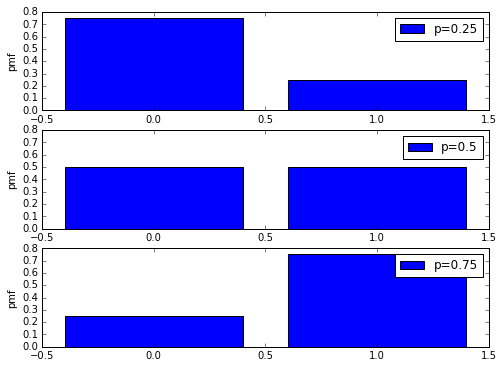

In [23]:
draw_pmfs_grid(scs.bernoulli, ('p'), [(.25,), (.5,), (.75,)], [0,1])

### Binomial distribution

The [**Binomial distribution**](https://en.wikipedia.org/wiki/Binomial_distribution) is generated by adding together $n$ Bernoulii distributions. The probability mass function is

$$pmf(k;n,p) = {n \choose k} p^k (1-p)^{n-k} $$

This comes from the fact that there are $n \choose k$ ways in which the underlying Bernoulli distributions can have values of 1 or 0.

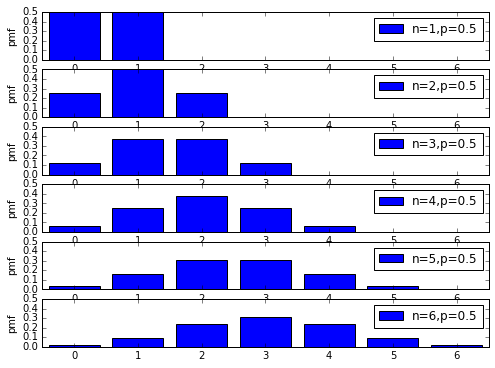

In [24]:
draw_pmfs_grid(scs.binom, ('n', 'p'), [(1,.5), (2,.5), (3,.5), (4,.5), (5,.5), (6,.5)], range(0,7))

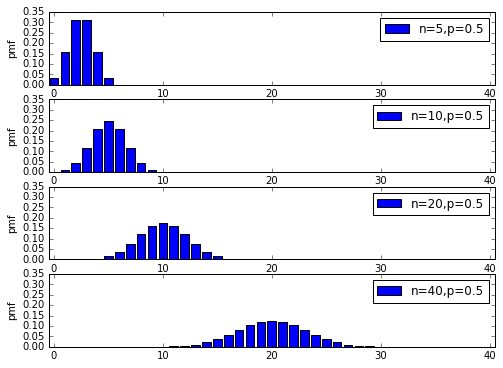

In [25]:
draw_pmfs_grid(scs.binom, ('n', 'p'), [(5,.5), (10,.5), (20,.5), (40,.5)], range(0,41))

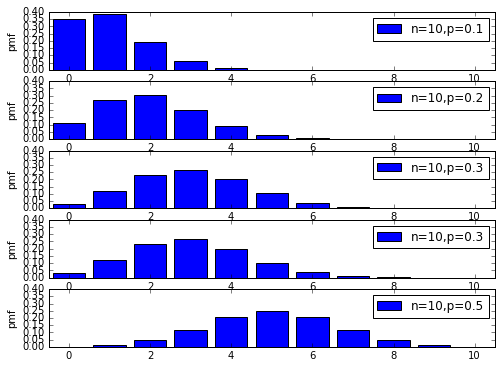

In [26]:
draw_pmfs_grid(scs.binom, ('n', 'p'), [(10,.1), (10,.2), (10,.3), (10,.3), (10,.5)], range(0,11))

### Hypergeometric distribution

The [**Hypergeometric distribution**](https://en.wikipedia.org/wiki/Hypergeometric_distribution) is a generalization of the binomial distribution, but rather than each success or failure an independent event with probability $p$ of success, they are calculated by randomly selecting from a set of $N$ objects of which $K$ are successes, *without* replacement.

$$pdf(k; N,K,n) = \frac{{K \choose k}{N-K \choose n-k}}{N \choose n}$$

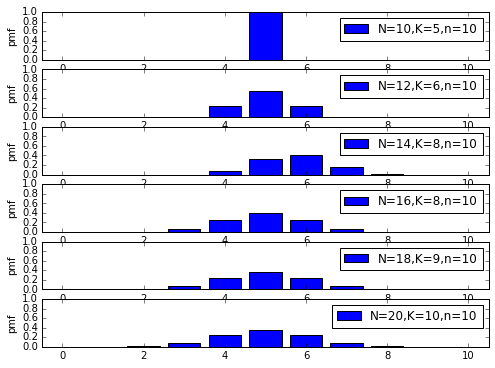

In [27]:
draw_pmfs_grid(scs.hypergeom, ('N', 'K', 'n'), [(10,5,10),(12,6,10),(14,8,10),(16,8,10),(18,9,10),(20,10,10)], range(0,11))

### Negative binomial distribution

Another related distribution is the [**Negative binomial distribution**](https://en.wikipedia.org/wiki/Negative_binomial_distribution) with parameters $p$ and $r$ and a pmf of

$$pmf(k; n,p) = {k+n-1 \choose k} (1-p)^n p^k$$

Rather than measuring the number of successes out of $n$ trials, it measures the number of successes until there have been $n$ failures.

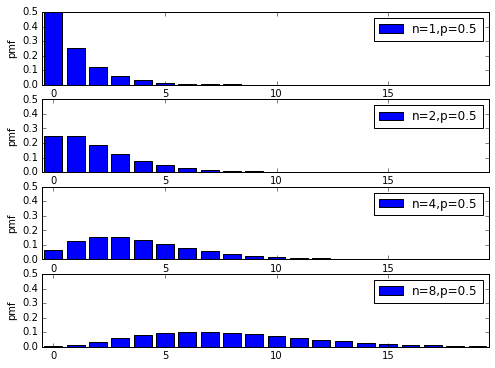

In [28]:
draw_pmfs_grid(scs.nbinom, ('n', 'p'), [(1,.5), (2,.5), (4,.5), (8,.5)], range(0,20))

### Geometric distribution

The [**Geometric distribution**](https://en.wikipedia.org/wiki/Geometric_distribution) is a special case of the negative binomial distribution for $n=1$, so just has one parameter $p$. Alternatively, the negative binomial is the sum of geometric distributions, in the same way the binomial is the sum of Bernoulli distributions. The pmf is

$$pmf(k; p) = (1-p)^{k-1}p$$

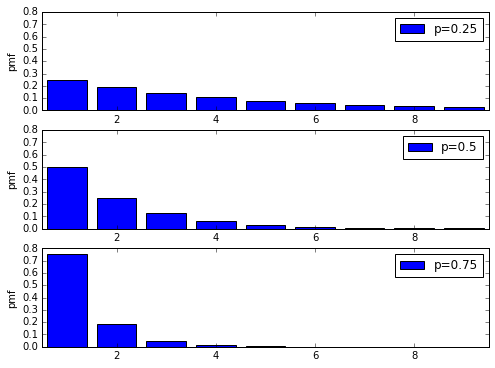

In [29]:
draw_pmfs_grid(scs.geom, ('p'), [(.25,), (.5,), (.75,)], range(1,10))

### Poisson distribution

The [**Poisson distribution**](https://en.wikipedia.org/wiki/Poisson_distribution) represents to probability that, assuming some rate of independent events some number of events will happen. The pmf is

$$pmf(k; \lambda) = \frac{\lambda^k e^-\lambda}{k!}$$

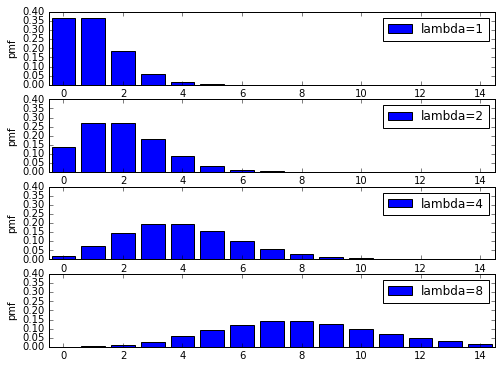

In [30]:
draw_pmfs_grid(scs.poisson, ('lambda',), [(1,), (2,), (4,), (8,)], range(15))

## Continuous distributions

### Normal distribution


The [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) is the most important distribution due to the *central limit theorem* which will be covered later. The pdf is

$$pmf(x; \mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma}}$$


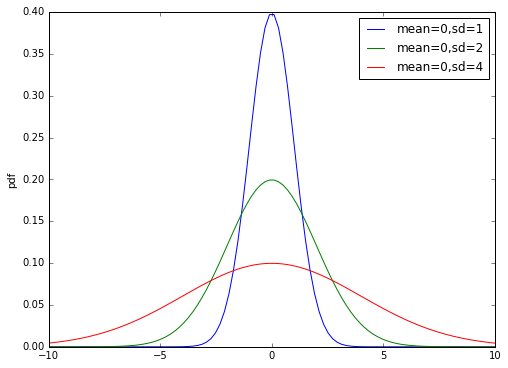

In [31]:
draw_pdfs(scs.norm, ("mean", "sd"), [(0,1),(0,2),(0,4)], -10, 10)

### Beta distribution
The [**beta distribution**](https://en.wikipedia.org/wiki/Beta_distribution) is mostly used as the [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) to the binomial distribution in Bayesian statistics, but it can also be seen as the distribution of an [order statistic](https://en.wikipedia.org/wiki/Order_statistic) of uniformly-distributed random variables.

Consider $\alpha + \beta - 1$ numbers choosed from $U(0,1)$. The $\alpha^{th}$ largest number follows the distribution $Beta(\alpha, \beta)$. The pdf is given by

$$pdf(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$$

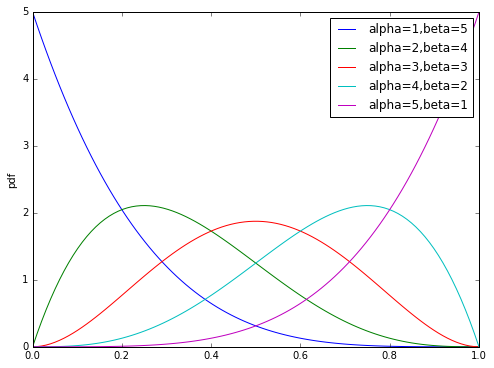

In [32]:
draw_pdfs(scs.beta, ("alpha", "beta"), [(1,5),(2,4),(3,3),(4,2),(5,1)], 0, 1)

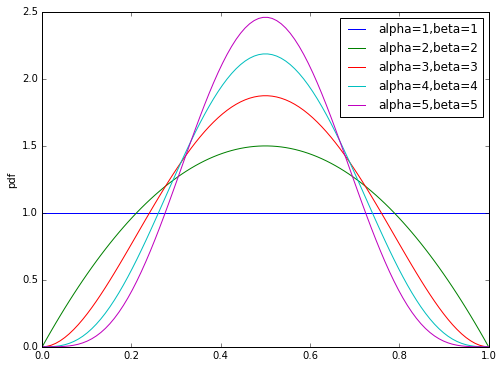

In [33]:
draw_pdfs(scs.beta, ("alpha", "beta"), [(1,1),(2,2),(3,3),(4,4),(5,5)], 0, 1)

### Gamma distribution

The [**Gamma distribution**](https://en.wikipedia.org/wiki/Gamma_distribution) is the conjugate of the beta distribution. Rather than looking at the distribution of events that occur over a given amount of time, the gamma distribution shows the time before some given number of events occurs. The pmf is given by

$$pmf(x; k, \theta) = \frac{1}{\Gamma(k)\theta^k} x^{k-1}e^{-\frac{x}{\theta}}$$

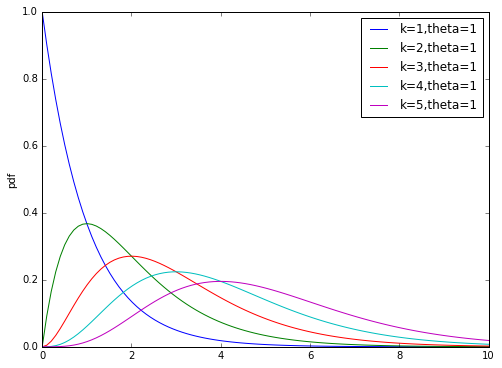

In [34]:
draw_pdfs(scs.gamma, ("k", None, "theta"), [(1,0,1),(2,0,1),(3,0,1),(4,0,1),(5,0,1)], 0, 10)

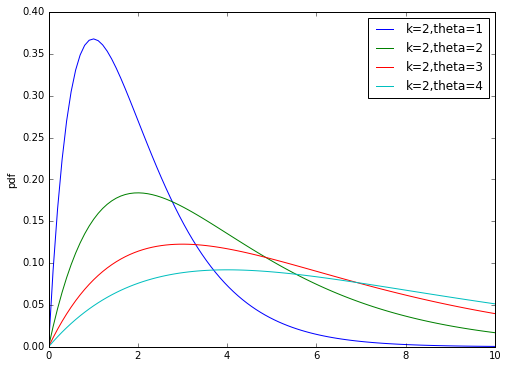

In [35]:
draw_pdfs(scs.gamma, ("k", None, "theta"), [(2,0,1),(2,0,2),(2,0,3),(2,0,4)], 0, 10)

### Exponential distribution

The [**exponential distribution**](https://en.wikipedia.org/wiki/Exponential_distribution) is a special case of the gamma distribution for $k=0$. The pdf is given by

$$pdf(x; \theta) = \frac{1}{\theta} e^{-\frac{x}{\theta}}$$

though it's usually parameterized with $\lambda = \frac{1}{\theta}$.

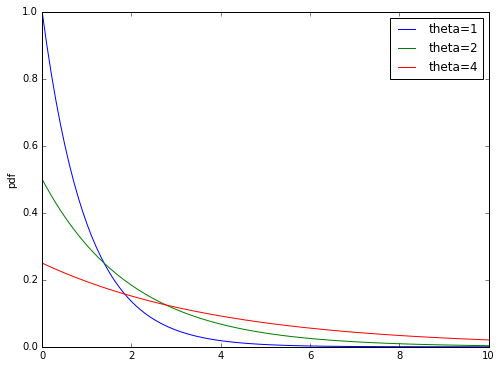

In [36]:
draw_pdfs(scs.expon, (None, "theta"), [(0,1),(0,2),(0,4)], 0, 10)